<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.976674,51.649457,35.683416,30.672051,-16.715041,151.266557,175.364631,-24.098074
1,0.0,1.0,98.030830,49.953083,67.141803,39.914688,45.621061,310.661465,261.036039,49.625426
2,0.0,2.0,72.940088,44.795461,98.861076,55.621493,18.844104,301.062221,288.350187,12.712034
3,0.0,3.0,58.102300,41.029967,32.414397,23.718467,41.490814,206.755946,168.547104,38.208843
4,0.0,4.0,70.360856,22.728797,71.253094,44.939023,44.111273,263.393043,224.984208,38.408835
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.357740,41.929733,25.580903,25.248251,-31.526319,144.590307,180.965197,-36.374890
249996,999.0,246.0,20.421572,76.965666,24.618906,74.402068,-68.515314,137.892898,185.450883,-47.557985
249997,999.0,247.0,69.762321,56.981631,73.254806,24.329024,7.887854,242.215636,238.133819,4.081817
249998,999.0,248.0,27.627647,21.662384,53.106302,52.797110,-0.211680,164.981763,160.626836,4.354927


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    39.976674  51.649457  35.683416  30.672051 -16.715041   
      1.0    98.030830  49.953083  67.141803  39.914688  45.621061   
      2.0    72.940088  44.795461  98.861076  55.621493  18.844104   
      3.0    58.102300  41.029967  32.414397  23.718467  41.490814   
      4.0    70.360856  22.728797  71.253094  44.939023  44.111273   
...                ...        ...        ...        ...        ...   
999.0 245.0  73.357740  41.929733  25.580903  25.248251 -31.526319   
      246.0  20.421572  76.965666  24.618906  74.402068 -68.515314   
      247.0  69.762321  56.981631  73.254806  24.329024   7.887854   
      248.0  27.627647  21.662384  53.106302  52.797110  -0.211680   
      249.0  66.527212  31.639626  46.803359  40.265427  12.277183   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    151.266557  175.364631 -24.098074  
      1.0    310.661465  261.036039  49.625426  
      2.0    301.062221  288.350187  12.712034  
      3.0    206.755946  168.547104  38.208843  
      4.0    263.393043  224.984208  38.408835  
...                 ...         ...        ...  
999.0 245.0  144.590307  180.965197 -36.374890  
      246.0  137.892898  185.450883 -47.557985  
      247.0  242.215636  238.133819   4.081817  
      248.0  164.981763  160.626836   4.354927  
      249.0  207.512807  199.293948   8.218859  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    39.976674  51.649457  35.683416  30.672051 -16.715041   
      1.0    98.030830  49.953083  67.141803  39.914688  45.621061   
      2.0    72.940088  44.795461  98.861076  55.621493  18.844104   
      3.0    58.102300  41.029967  32.414397  23.718467  41.490814   
      4.0    70.360856  22.728797  71.253094  44.939023  44.111273   
...                ...        ...        ...        ...        ...   
999.0 245.0  73.357740  41.929733  25.580903  25.248251 -31.526319   
      246.0  20.421572  76.965666  24.618906  74.402068 -68.515314   
      247.0  69.762321  56.981631  73.254806  24.329024   7.887854   
      248.0  27.627647  21.662384  53.106302  52.797110  -0.211680   
      249.0  66.527212  31.639626  46.803359  40.265427  12.277183   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    151.266557  175.364631 -24.098074  
      1.0    310.661465  261.036039  49.625426  
      2.0    301.062221  288.350187  12.712034  
      3.0    206.755946  168.547104  38.208843  
      4.0    263.393043  224.984208  38.408835  
...                 ...         ...        ...  
999.0 245.0  144.590307  180.965197 -36.374890  
      246.0  137.892898  185.450883 -47.557985  
      247.0  242.215636  238.133819   4.081817  
      248.0  164.981763  160.626836   4.354927  
      249.0  207.512807  199.293948   8.218859  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.976674,51.649457,35.683416,30.672051,-16.715041,151.266557,175.364631,-24.098074
1,0.0,1.0,98.030830,49.953083,67.141803,39.914688,45.621061,310.661465,261.036039,49.625426
2,0.0,2.0,72.940088,44.795461,98.861076,55.621493,18.844104,301.062221,288.350187,12.712034
3,0.0,3.0,58.102300,41.029967,32.414397,23.718467,41.490814,206.755946,168.547104,38.208843
4,0.0,4.0,70.360856,22.728797,71.253094,44.939023,44.111273,263.393043,224.984208,38.408835
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.357740,41.929733,25.580903,25.248251,-31.526319,144.590307,180.965197,-36.374890
249996,999.0,246.0,20.421572,76.965666,24.618906,74.402068,-68.515314,137.892898,185.450883,-47.557985
249997,999.0,247.0,69.762321,56.981631,73.254806,24.329024,7.887854,242.215636,238.133819,4.081817
249998,999.0,248.0,27.627647,21.662384,53.106302,52.797110,-0.211680,164.981763,160.626836,4.354927


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    39.976674  51.649457  35.683416  30.672051 -16.715041   
      1.0    98.030830  49.953083  67.141803  39.914688  45.621061   
      2.0    72.940088  44.795461  98.861076  55.621493  18.844104   
      3.0    58.102300  41.029967  32.414397  23.718467  41.490814   
      4.0    70.360856  22.728797  71.253094  44.939023  44.111273   
...                ...        ...        ...        ...        ...   
999.0 245.0  73.357740  41.929733  25.580903  25.248251 -31.526319   
      246.0  20.421572  76.965666  24.618906  74.402068 -68.515314   
      247.0  69.762321  56.981631  73.254806  24.329024   7.887854   
      248.0  27.627647  21.662384  53.106302  52.797110  -0.211680   
      249.0  66.527212  31.639626  46.803359  40.265427  12.277183   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    151.266557  175.364631 -24.098074  
      1.0    310.661465  261.036039  49.625426  
      2.0    301.062221  288.350187  12.712034  
      3.0    206.755946  168.547104  38.208843  
      4.0    263.393043  224.984208  38.408835  
...                 ...         ...        ...  
999.0 245.0  144.590307  180.965197 -36.374890  
      246.0  137.892898  185.450883 -47.557985  
      247.0  242.215636  238.133819   4.081817  
      248.0  164.981763  160.626836   4.354927  
      249.0  207.512807  199.293948   8.218859  

[250000 rows x 8 columns]

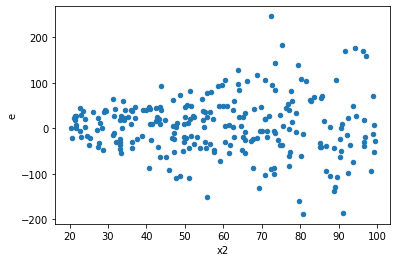

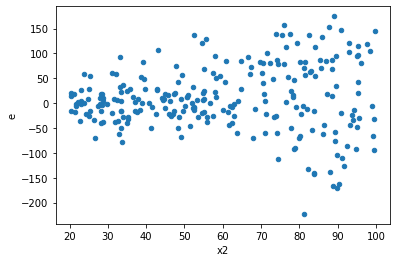

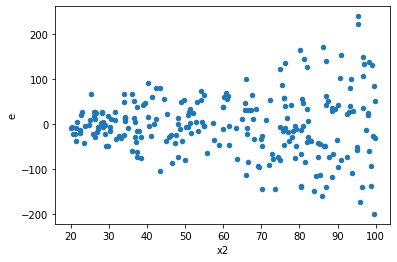

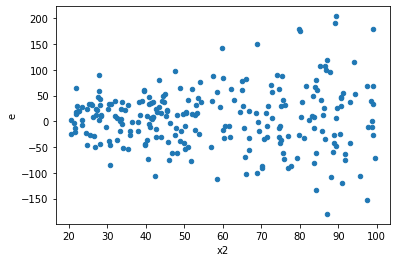

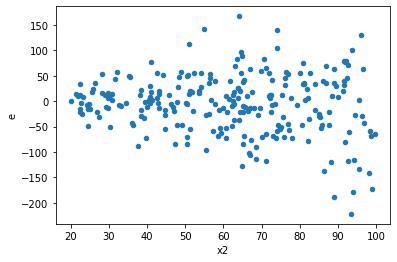

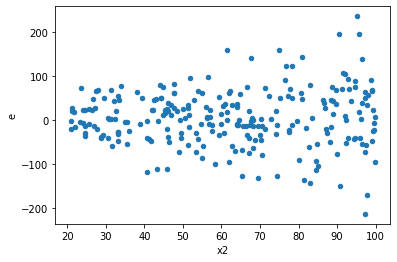

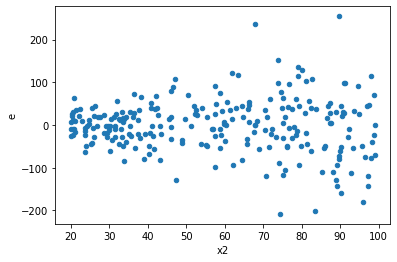

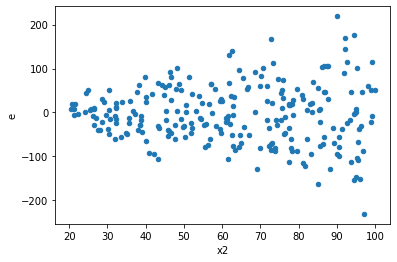

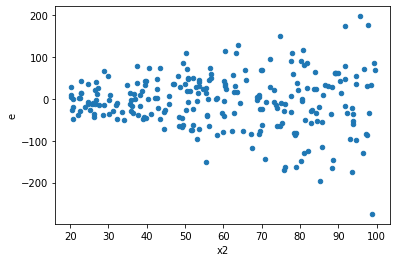

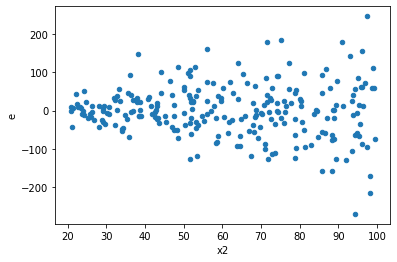

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,122.0,120.0,476627.5164738829,490701.00635960524,3906.782921917073,4089.1750529967103,1.0466860162760558,0.8026609085245813,0.5986695457377094,0.40133045426229064,Reject001=1 : Homoscedasticity
3.0,118.0,124.0,286118.74863722146,524397.6504918109,2424.735157942555,4229.013310417829,1.7441134948553503,0.0023565557800113712,0.9988217221099943,0.0011782778900056856,Reject001=0 : Heteroscedasticity
4.0,129.0,113.0,355315.379967748,414116.85024794185,2754.382790447659,3664.750887149928,1.330516186733185,0.1205613621012922,0.9397193189493539,0.0602806810506461,Reject001=1 : Homoscedasticity
6.0,120.0,122.0,249096.84631863856,701132.729728339,2075.8070526553215,5746.989587937205,2.7685567310245895,4.1847503906566885e-08,0.999999979076248,2.0923751953283443e-08,Reject001=0 : Heteroscedasticity
7.0,124.0,118.0,465532.9965087206,577608.533237255,3754.298358941295,4894.987569807246,1.3038355244593887,0.14690885610313908,0.9265455719484305,0.07345442805156954,Reject001=1 : Homoscedasticity
9.0,121.0,121.0,534407.6801471052,558105.3451062841,4416.592397909961,4612.440868646976,1.0443437956442836,0.8117754441347862,0.5941122779326069,0.4058877220673931,Reject001=1 : Homoscedasticity
16.0,118.0,124.0,563329.823946064,747130.02576407,4773.981558864949,6025.242143258629,1.262100003731723,0.20106175258921044,0.8994691237053948,0.10053087629460522,Reject001=1 : Homoscedasticity
19.0,126.0,116.0,533016.1641584812,497459.08015456295,4230.287017130803,4288.440346160025,1.0137468991568956,0.9423178571325104,0.5288410714337448,0.4711589285662552,Reject001=1 : Homoscedasticity
21.0,122.0,120.0,405189.4626517076,536136.4536120729,3321.225103702521,4467.803780100608,1.3452276315507412,0.10447118249195442,0.9477644087540228,0.05223559124597721,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,122.0,120.0,476627.5164738829,490701.00635960524,3906.782921917073,4089.1750529967103,1.0466860162760558,0.8026609085245813,Reject001=1 : Homoscedasticity
1.0,109.0,133.0,554022.7762522681,475689.3372106415,5082.777763782276,3576.611557974748,0.7036726223719968,0.057755433679709464,Reject001=1 : Homoscedasticity
2.0,124.0,118.0,953654.3272906338,163361.41965121476,7690.760703956725,1384.4188106035149,0.18001064704708108,2.9839343898868324e-19,Reject001=0 : Heteroscedasticity
3.0,118.0,124.0,286118.74863722146,524397.6504918109,2424.735157942555,4229.013310417829,1.7441134948553503,0.0023565557800113712,Reject001=0 : Heteroscedasticity
4.0,129.0,113.0,355315.379967748,414116.85024794185,2754.382790447659,3664.750887149928,1.330516186733185,0.1205613621012922,Reject001=1 : Homoscedasticity
5.0,123.0,119.0,526949.3158272109,410160.9024085496,4284.140779083015,3446.730272340753,0.804532448879632,0.23242727823993892,Reject001=1 : Homoscedasticity
6.0,120.0,122.0,249096.84631863856,701132.729728339,2075.8070526553215,5746.989587937205,2.7685567310245895,4.1847503906566885e-08,Reject001=0 : Heteroscedasticity
7.0,124.0,118.0,465532.9965087206,577608.533237255,3754.298358941295,4894.987569807246,1.3038355244593887,0.14690885610313908,Reject001=1 : Homoscedasticity
8.0,118.0,124.0,574322.9460731166,479211.3969869995,4867.143610789124,3864.6080402177377,0.7940197268169693,0.20714616851478154,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      625
Reject001=0 : Heteroscedasticity    375
Name: Result_test, dtype: int64